### 2.3.5. Decision trees

In [1]:
%matplotlib inline
import sys 
sys.path.append('..')
from preamble import *

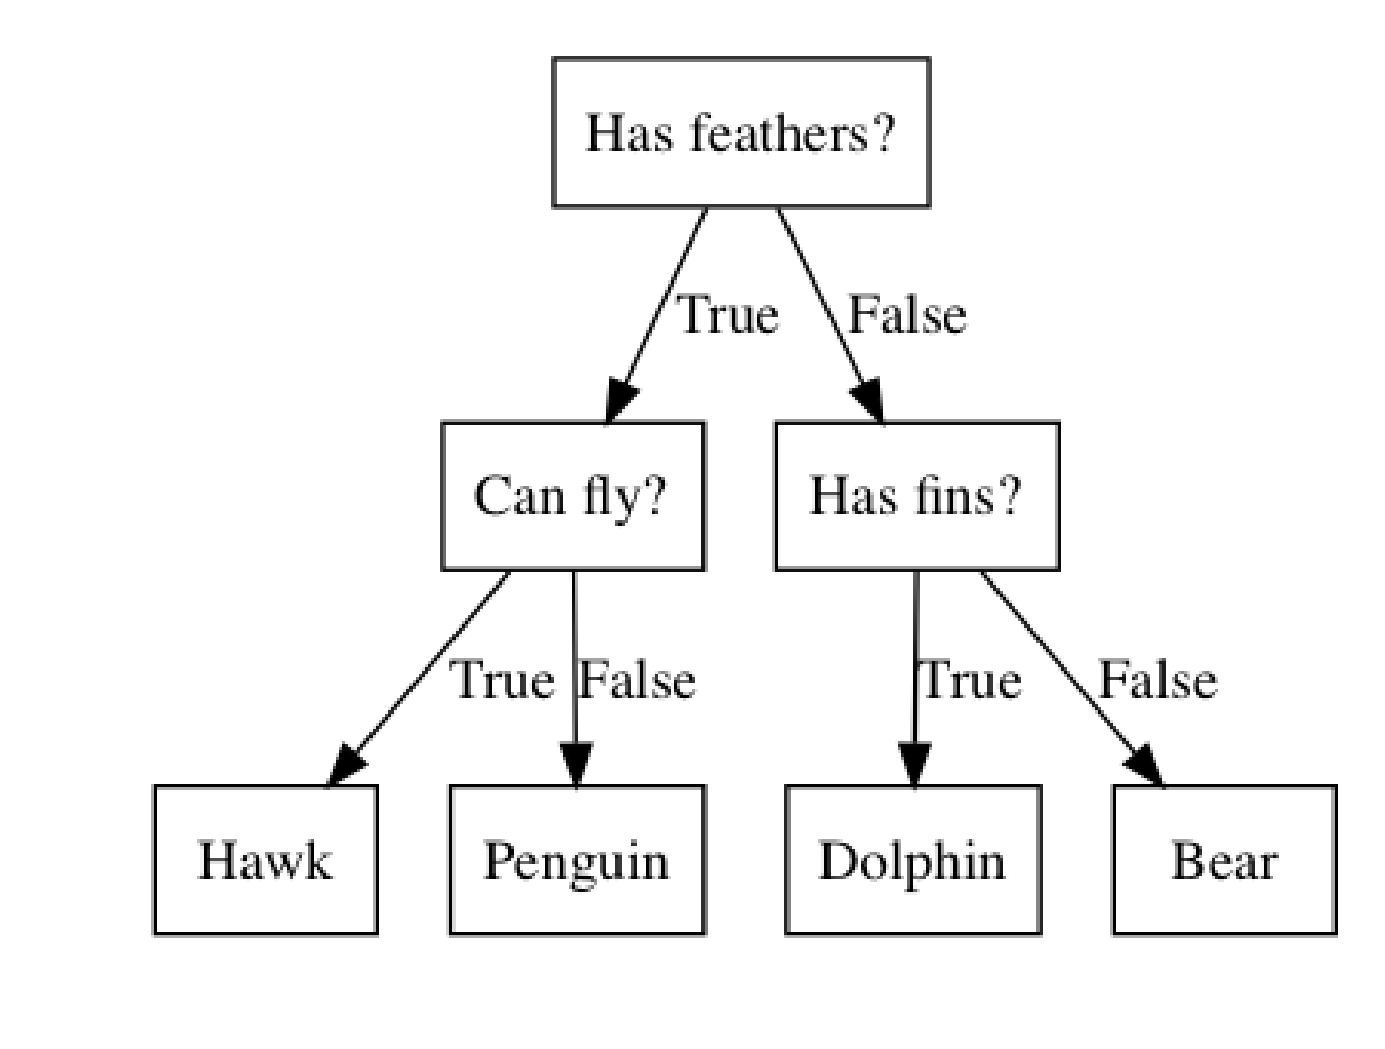

In [2]:
mglearn.plots.plot_animal_tree()

##### Building decision trees

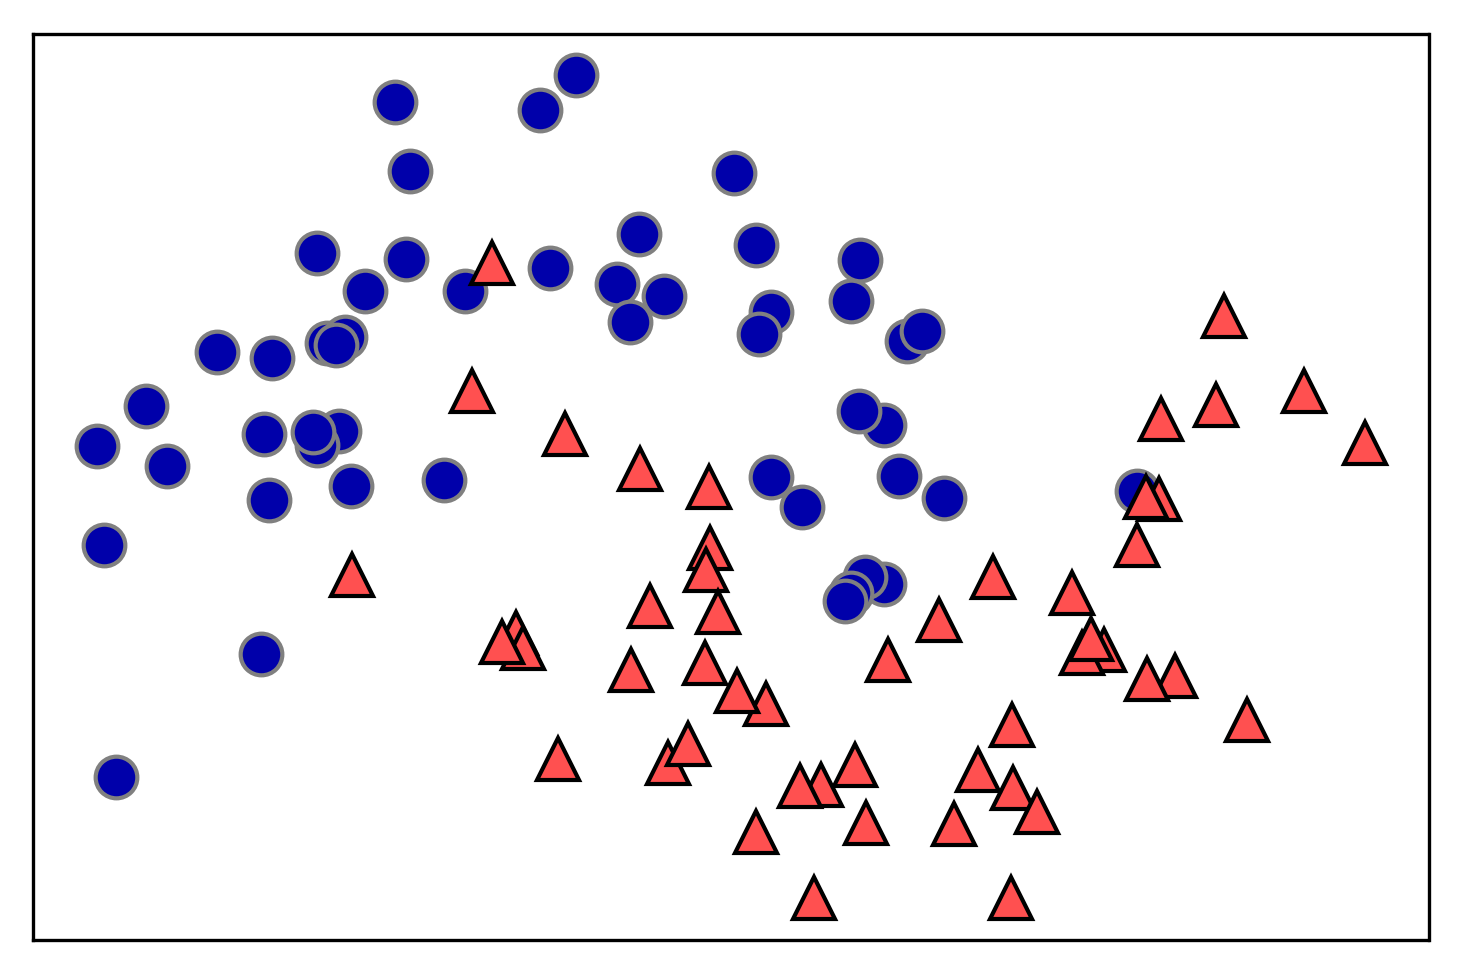

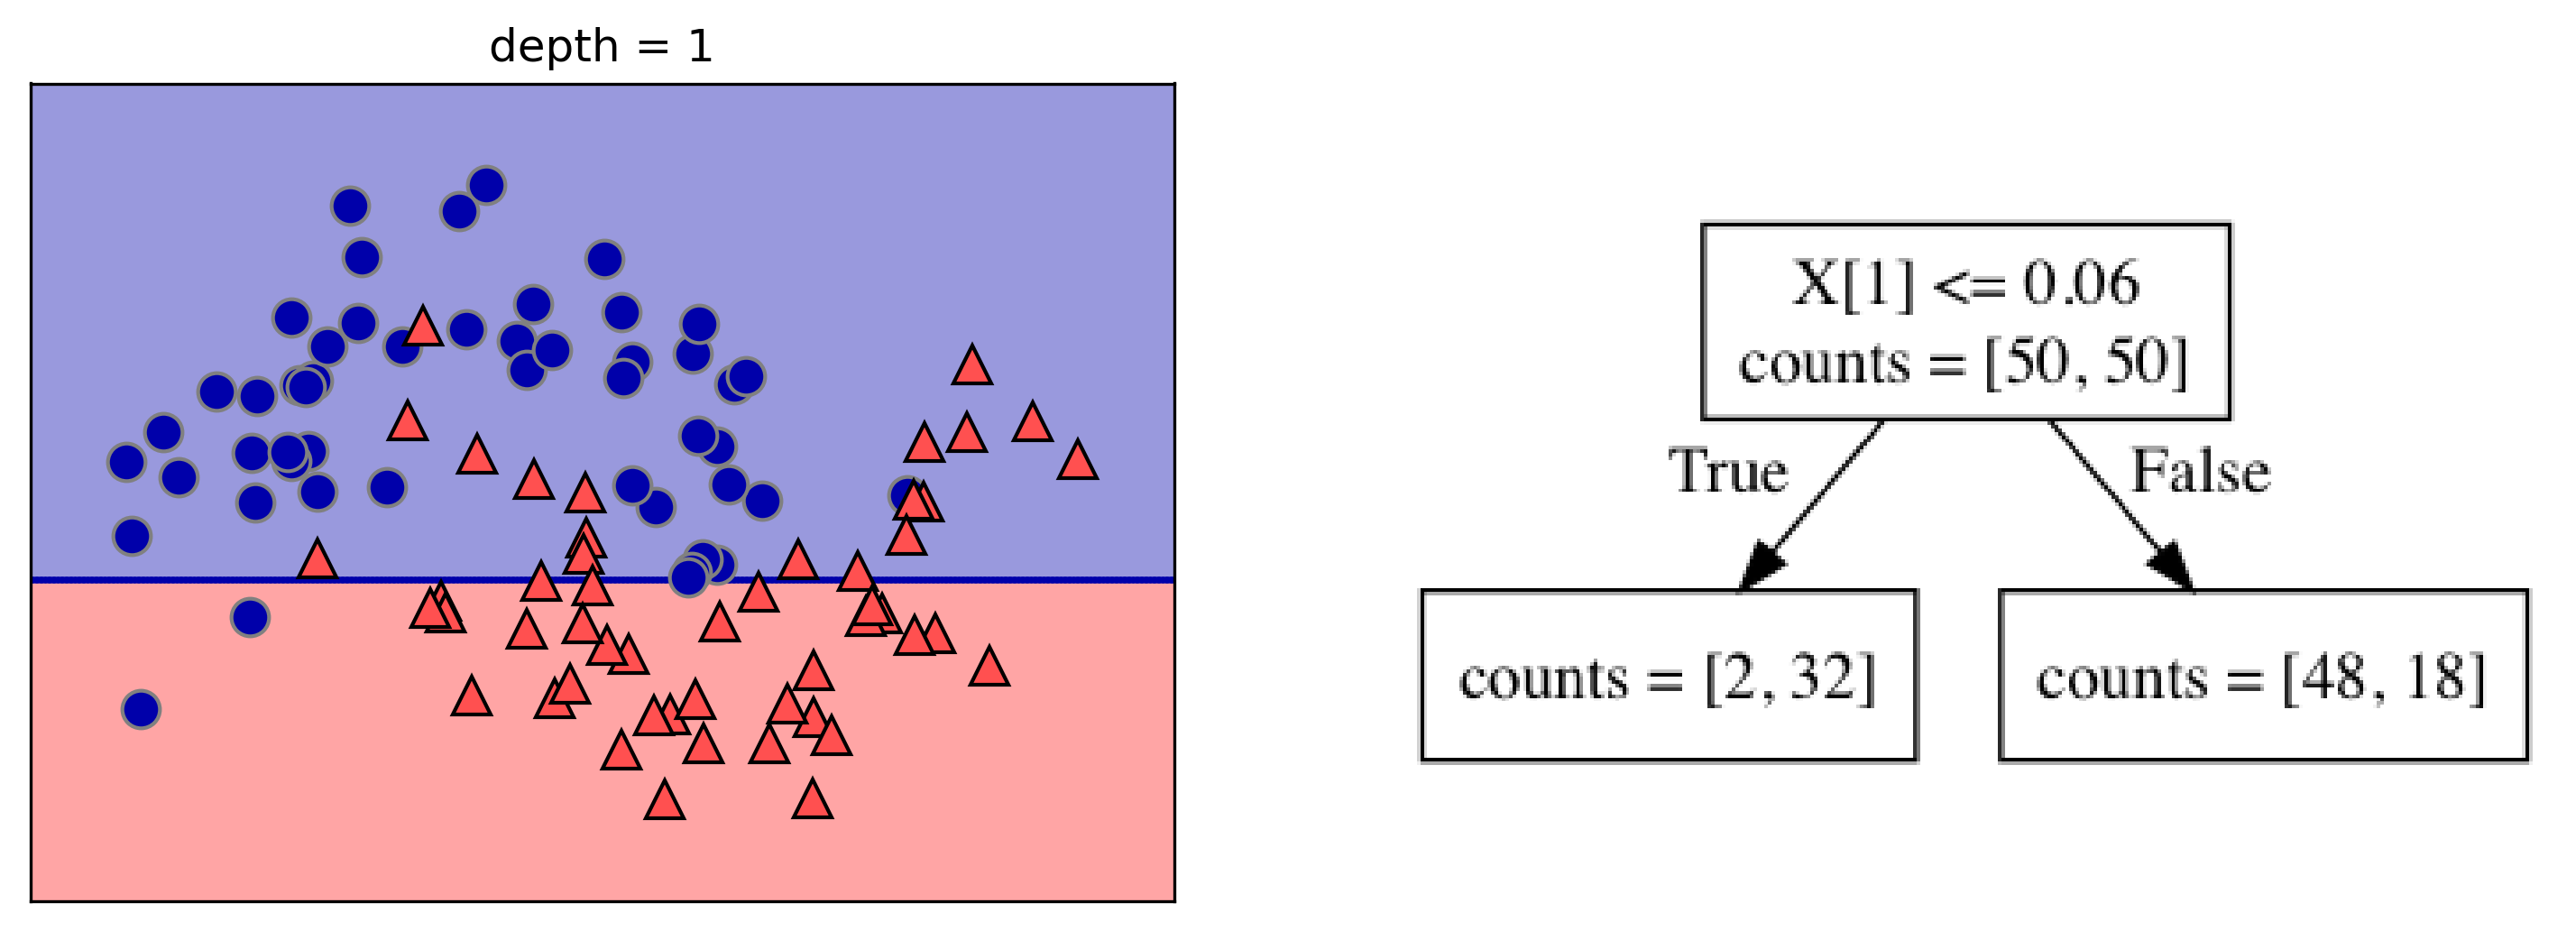

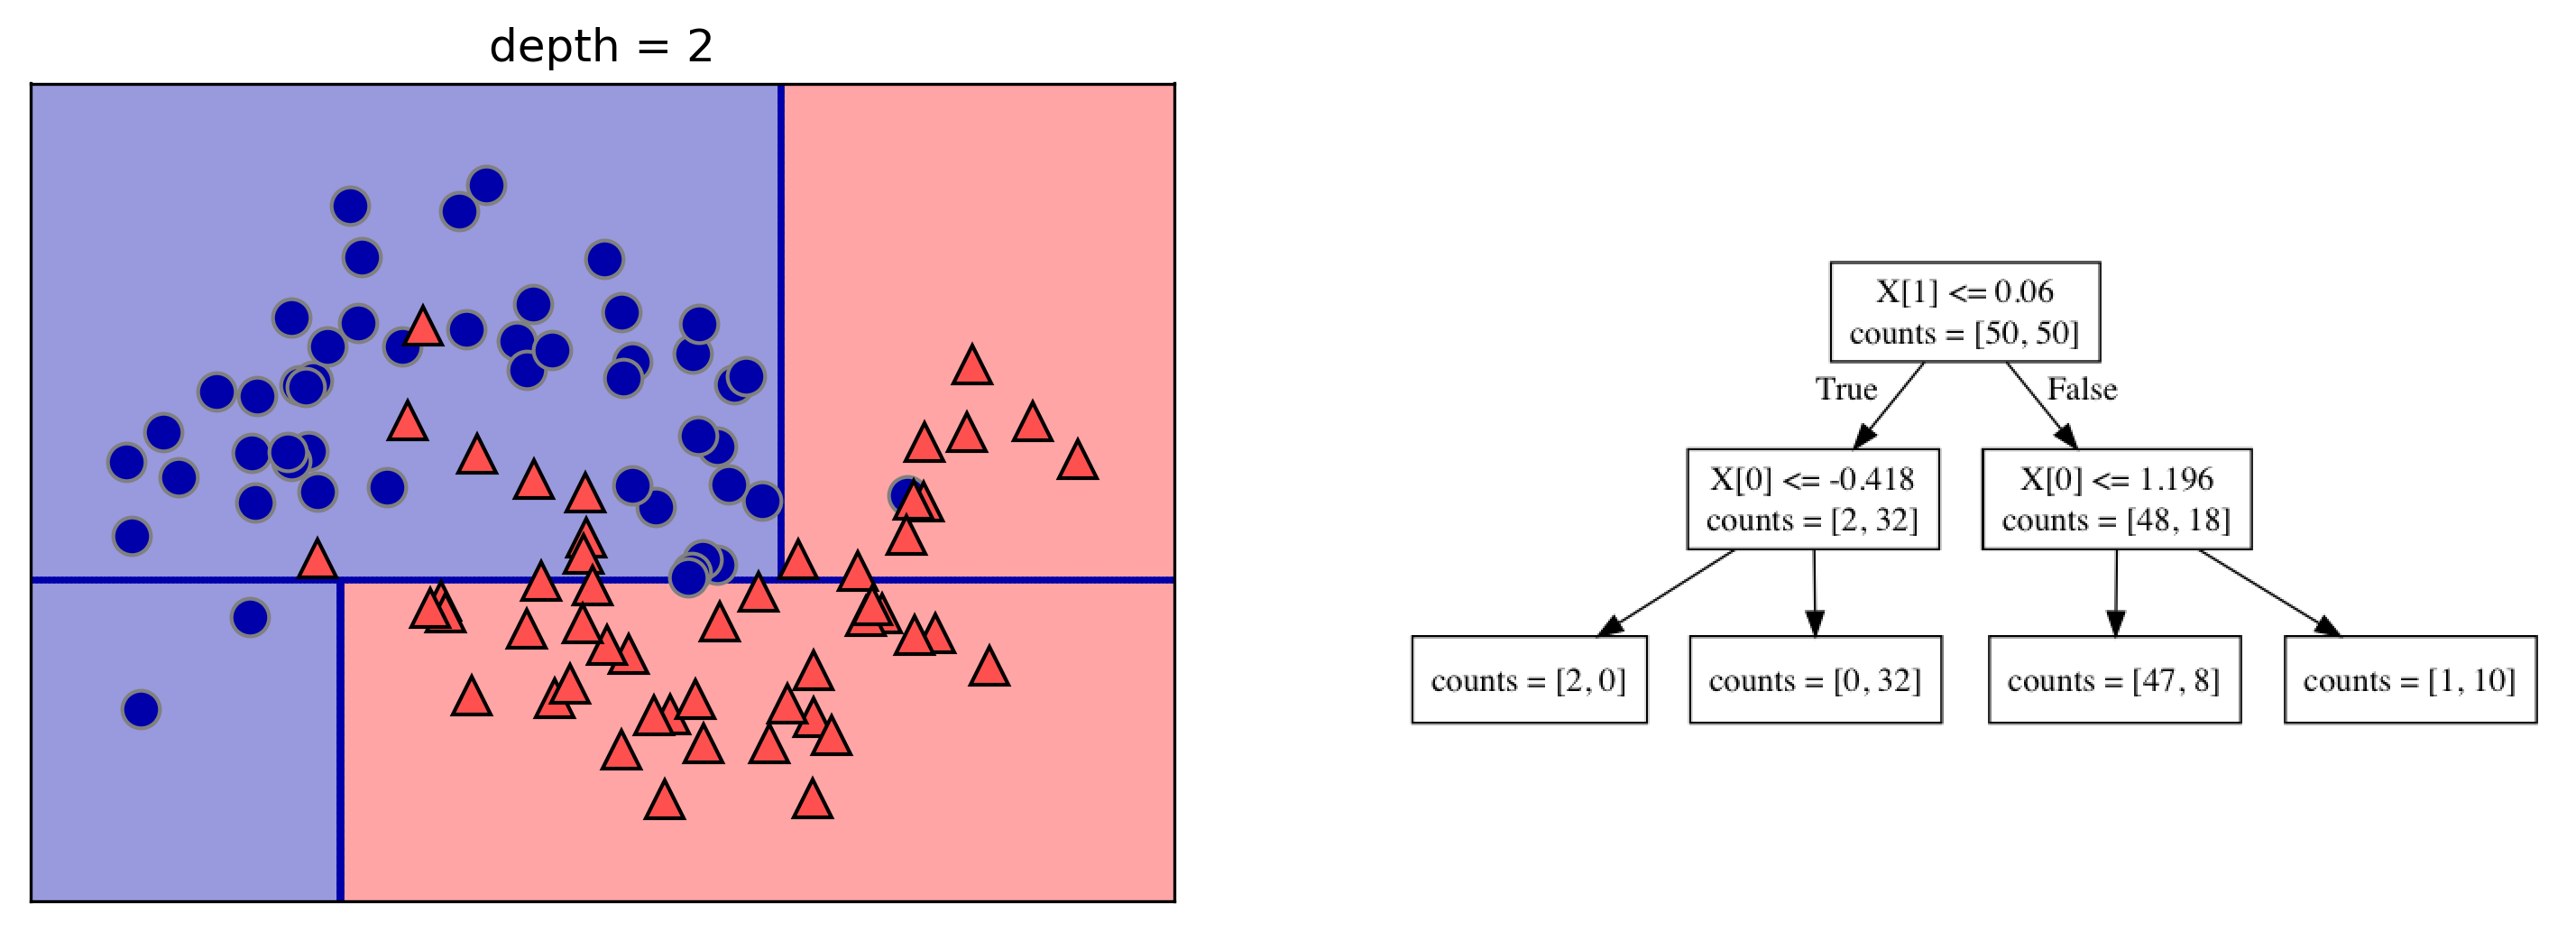

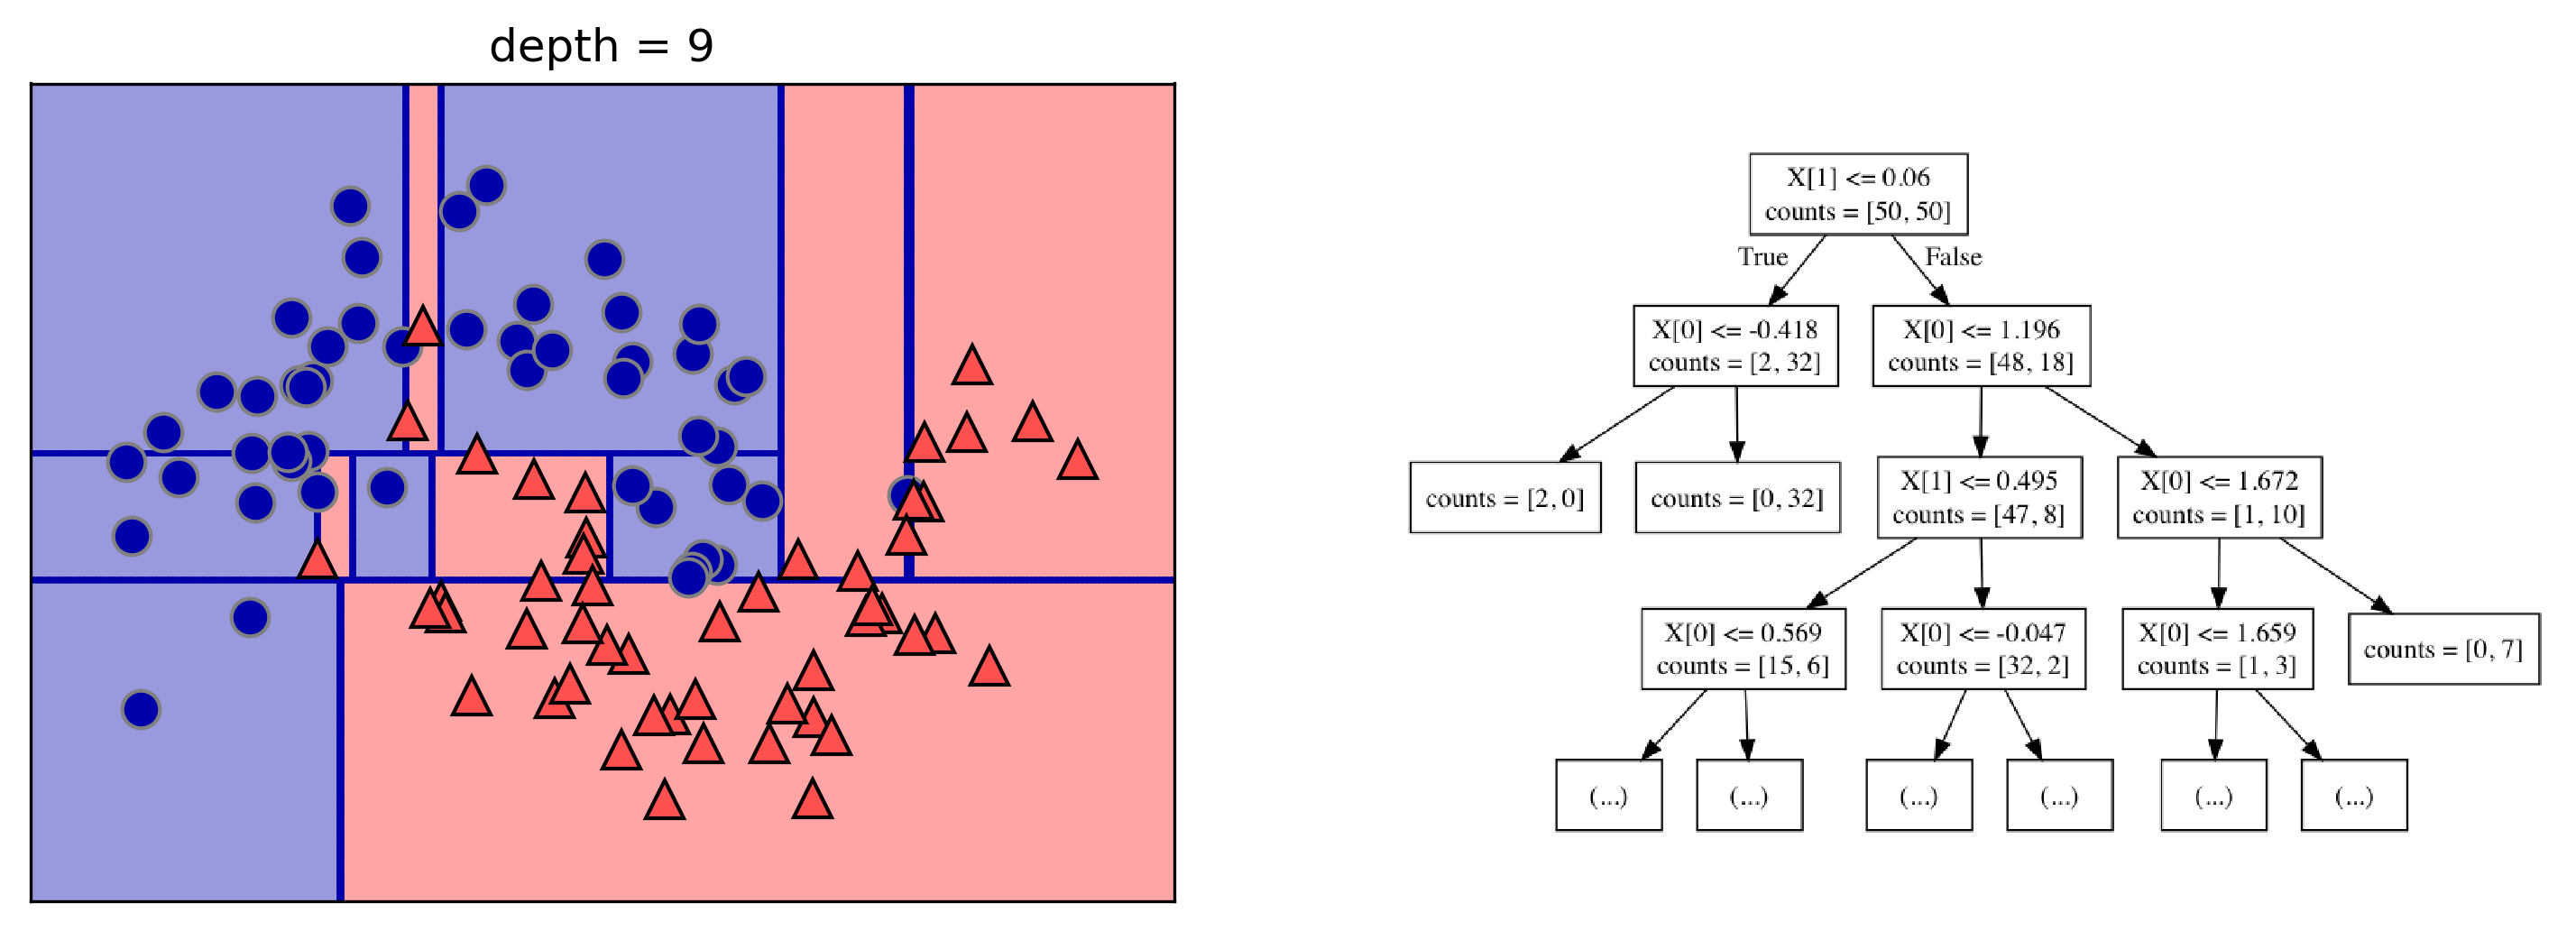

In [3]:
mglearn.plots.plot_tree_progressive()

##### Controlling complexity of decision trees

- Pre-pruning (사전 가지치기): 트리내 노드 생성을 사전에 중단 <--scikit-learn 에서 지원하는 것
- Post-pruning (사후 가지치기) or Pruning: 트리의 노드를 만든 이후 데이터 포인트가 적은 노드를 삭제하거나 병합

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [6]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


#### Analyzing Decision Trees


In [7]:
from sklearn.tree import export_graphviz
export_graphviz(tree, 
                out_file="tree.dot", 
                class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, 
                impurity=False, 
                filled=True # 노드의 분류 클래스가 구분되도록 색이 칠해짐
)

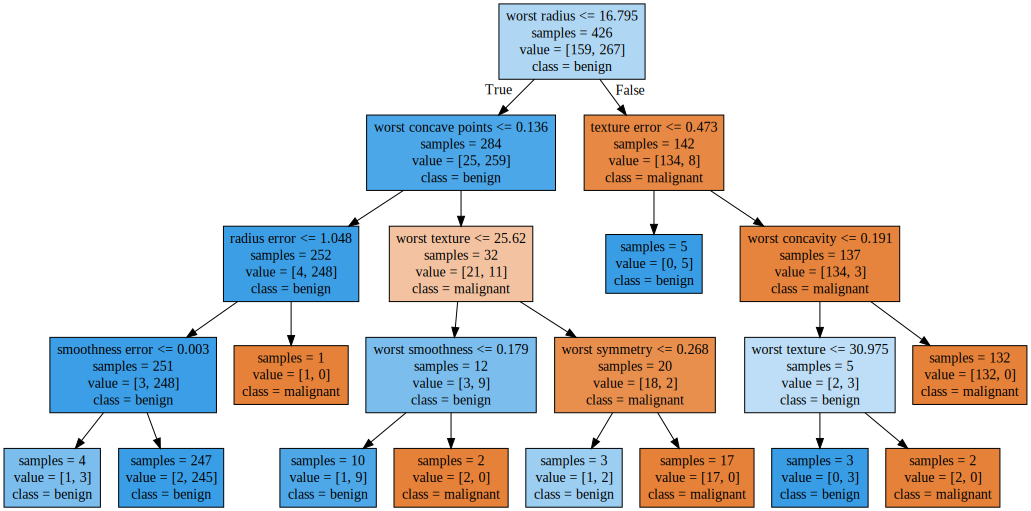

In [8]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees
- 특성 중요도 (Feature Impotance)
  - 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가
    - 0: 해당 특성이 분류에 전혀 활용되지 않았음
    - 1: 해당 특성이 분류를 하였고, 타깃 클래스를 정확하게 예측하였음을 나타냄

In [9]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.01  0.048
 0.    0.    0.002 0.    0.    0.    0.    0.    0.727 0.046 0.    0.
 0.014 0.    0.018 0.122 0.012 0.   ]


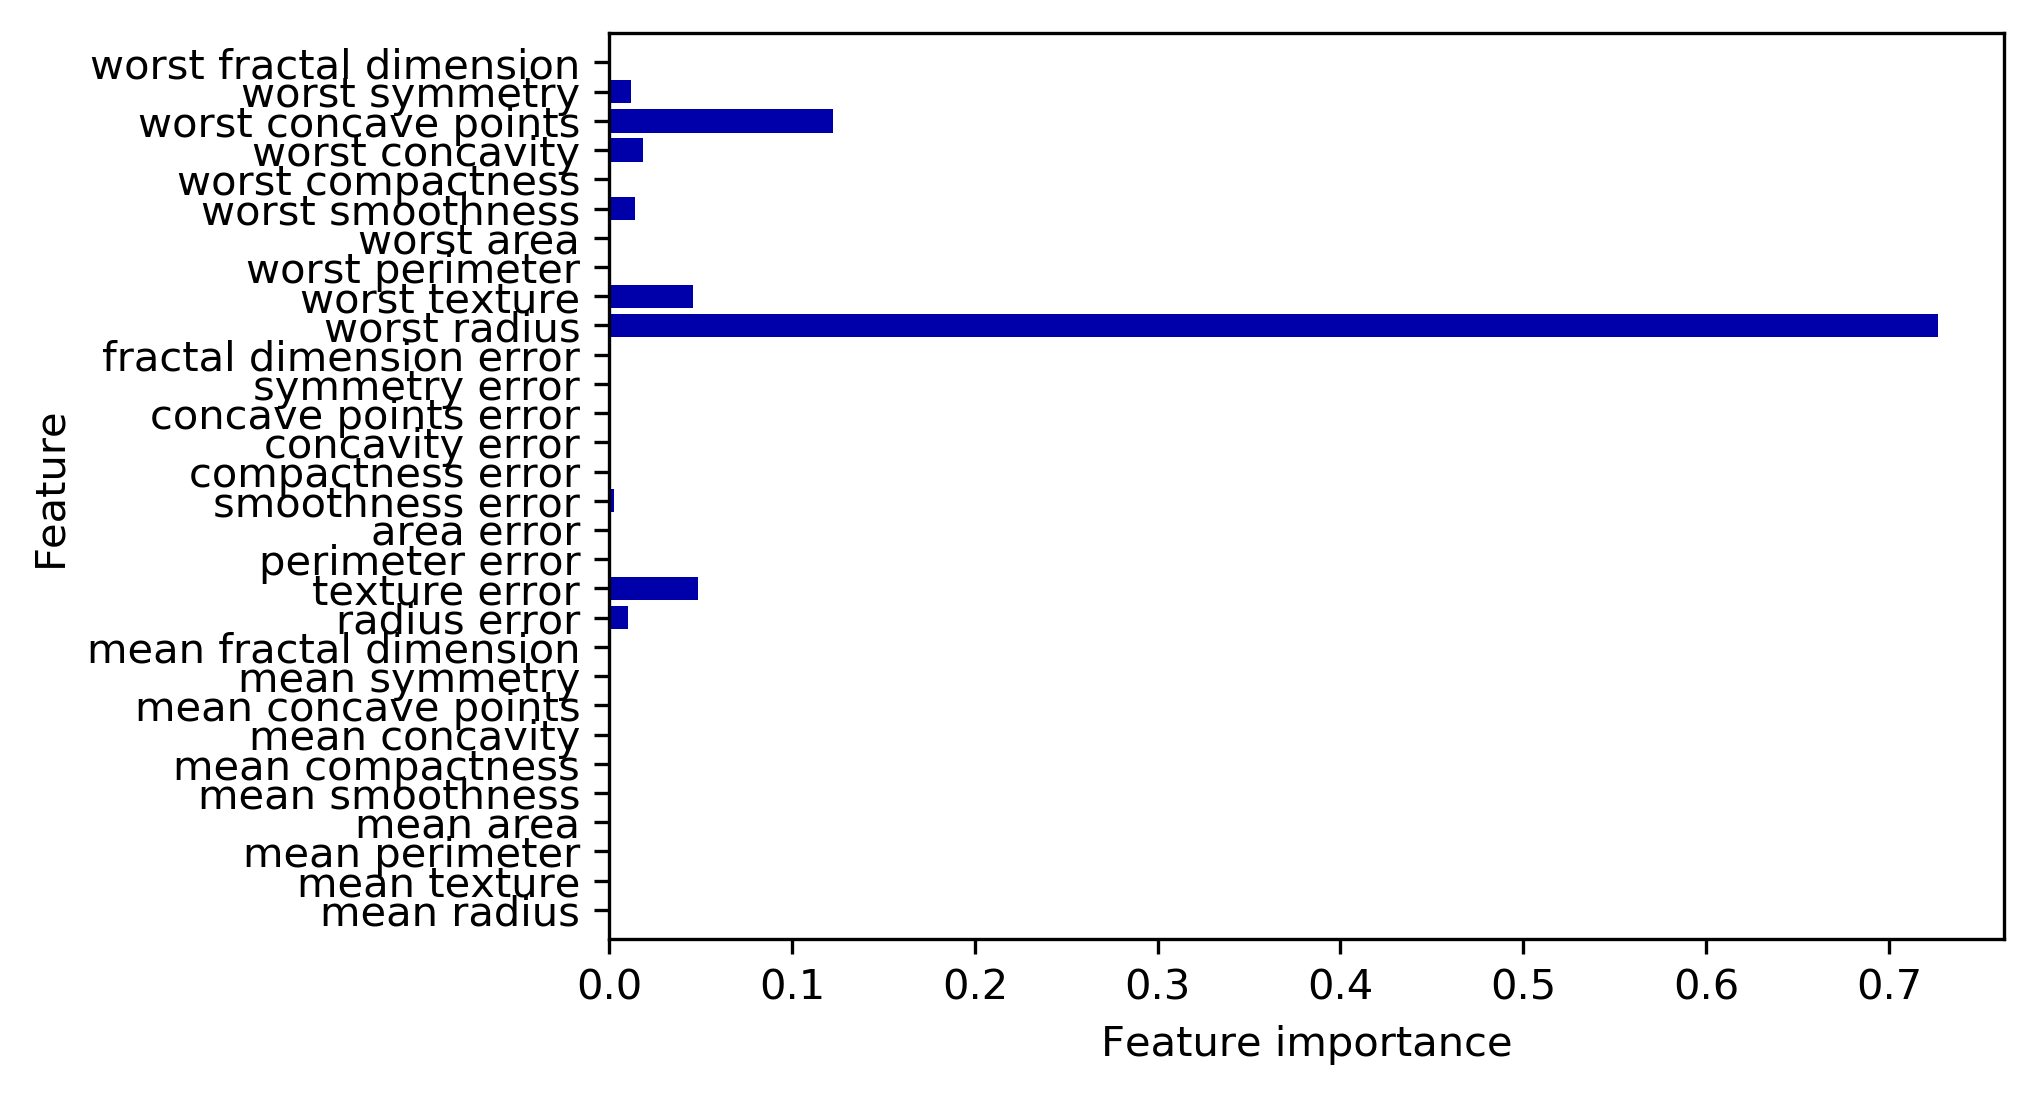

<Figure size 640x480 with 0 Axes>

In [10]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
    plt.show()


plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


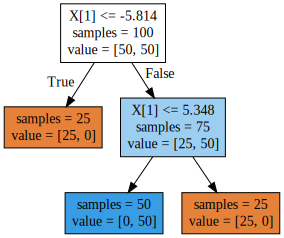

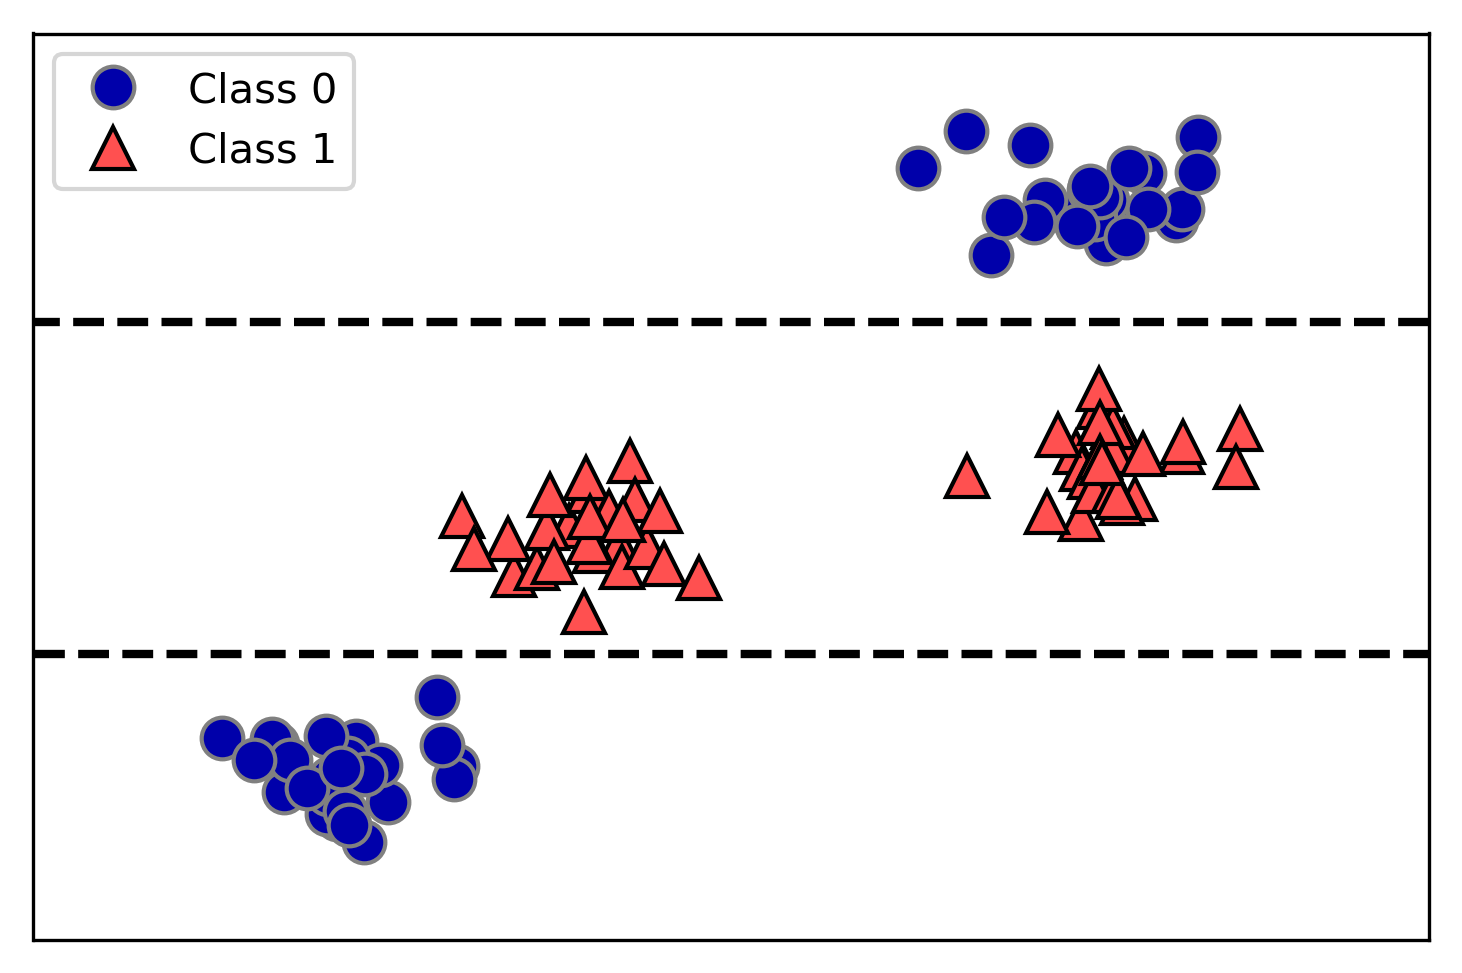

In [11]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

- Regression with DecisionTreeRegressor
- plt.semilogy()
  - Make a plot with log scaling on the `y` axis.

(333, 3)
   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06


Text(0,0.5,'Price in $/Mbyte')

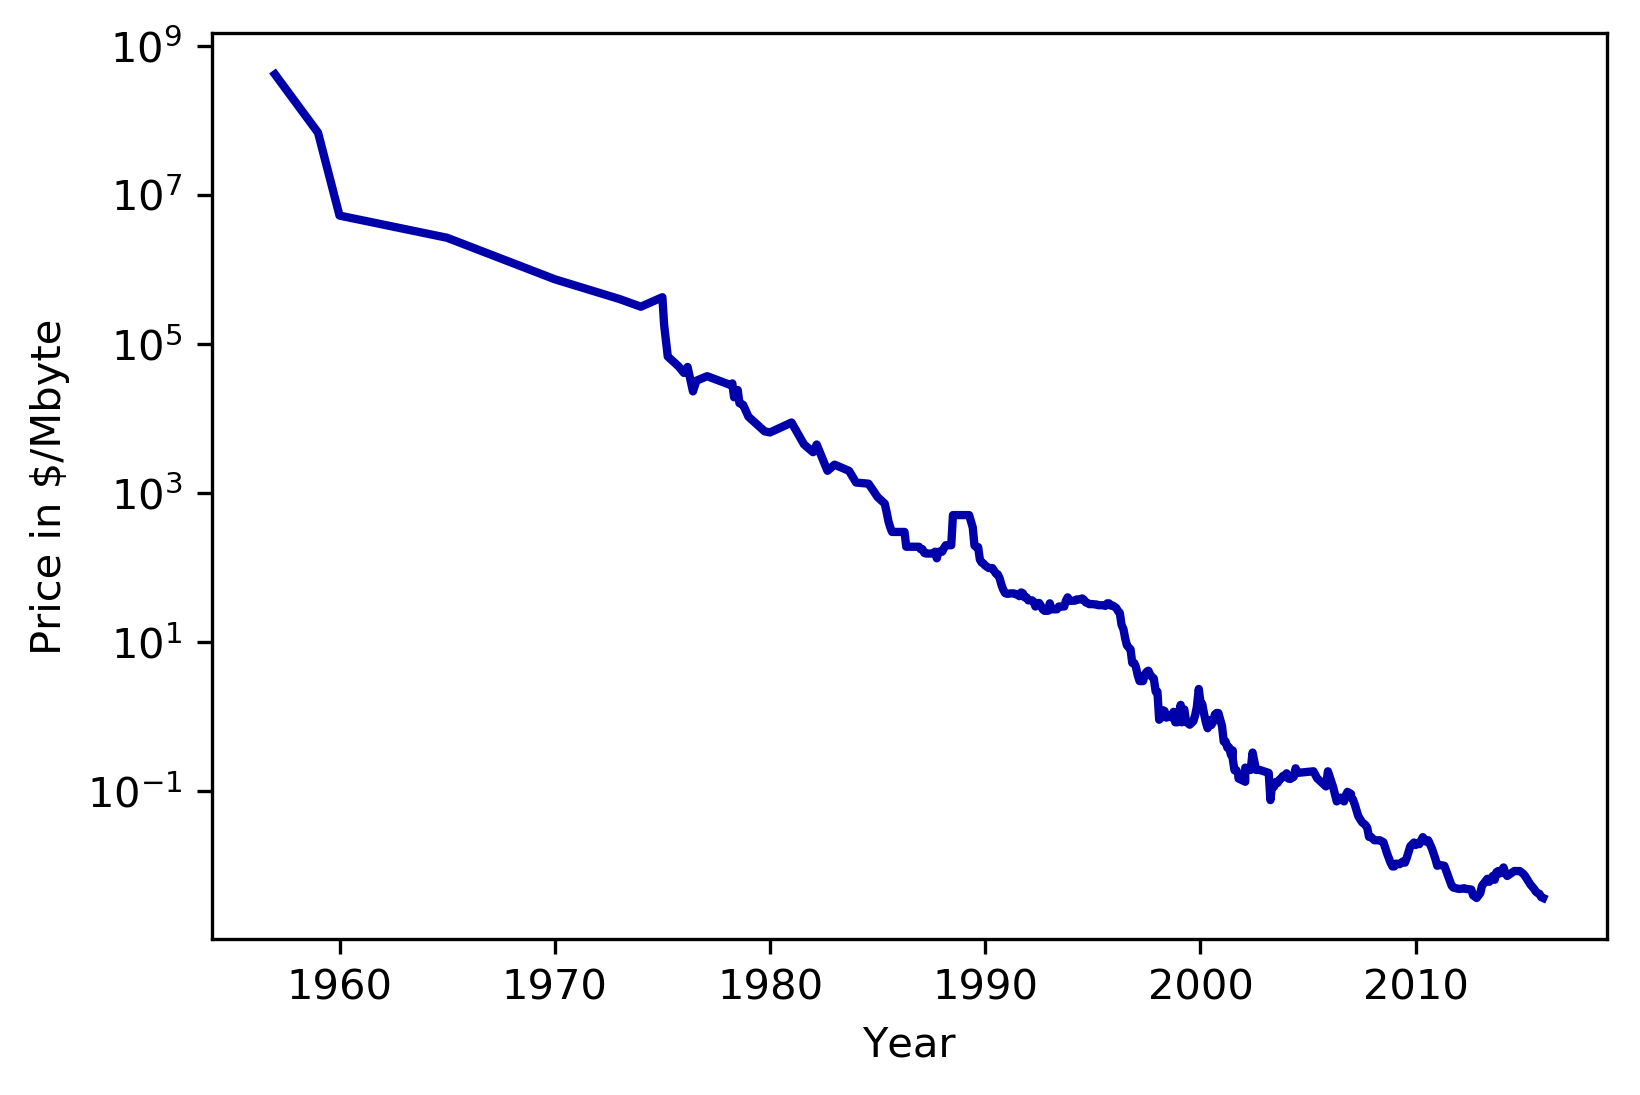

In [12]:
import os
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
print(ram_prices.shape)
print(ram_prices.head(3))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [13]:
from sklearn.tree import DecisionTreeRegressor
# use historical data to forecast prices after the year 2000
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

print(data_train.head(3))

print()

print(data_test.head(3))

   Unnamed: 0    date     price
0           0  1957.0  4.11e+08
1           1  1959.0  6.79e+07
2           2  1960.0  5.24e+06

     Unnamed: 0     date  price
202         202  2000.00   1.56
203         203  2000.08   1.48
204         204  2000.17   1.08


In [14]:
# predict prices based on date
# np.newaxis 으로 새로운 demension 생성
temp_X_train = data_train.date
print(temp_X_train[0])
print(temp_X_train[1])

print()

X_train = data_train.date[:, np.newaxis]
print(X_train.shape)
print(X_train[0])
print(X_train[1])

print()

# we use a log-transform to get a simpler relationship of data to target
y_train = np.log(data_train.price)
print(y_train.shape)
print(y_train[0])
print(y_train[1])

1957.0
1959.0

(202, 1)
[1957.]
[1959.]

(202,)
19.83420545098937
18.034249217500573


In [15]:
X_test = data_test.date[:, np.newaxis]
y_test = np.log(data_test.price)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

# predict on all data
X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

# undo log-transform
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

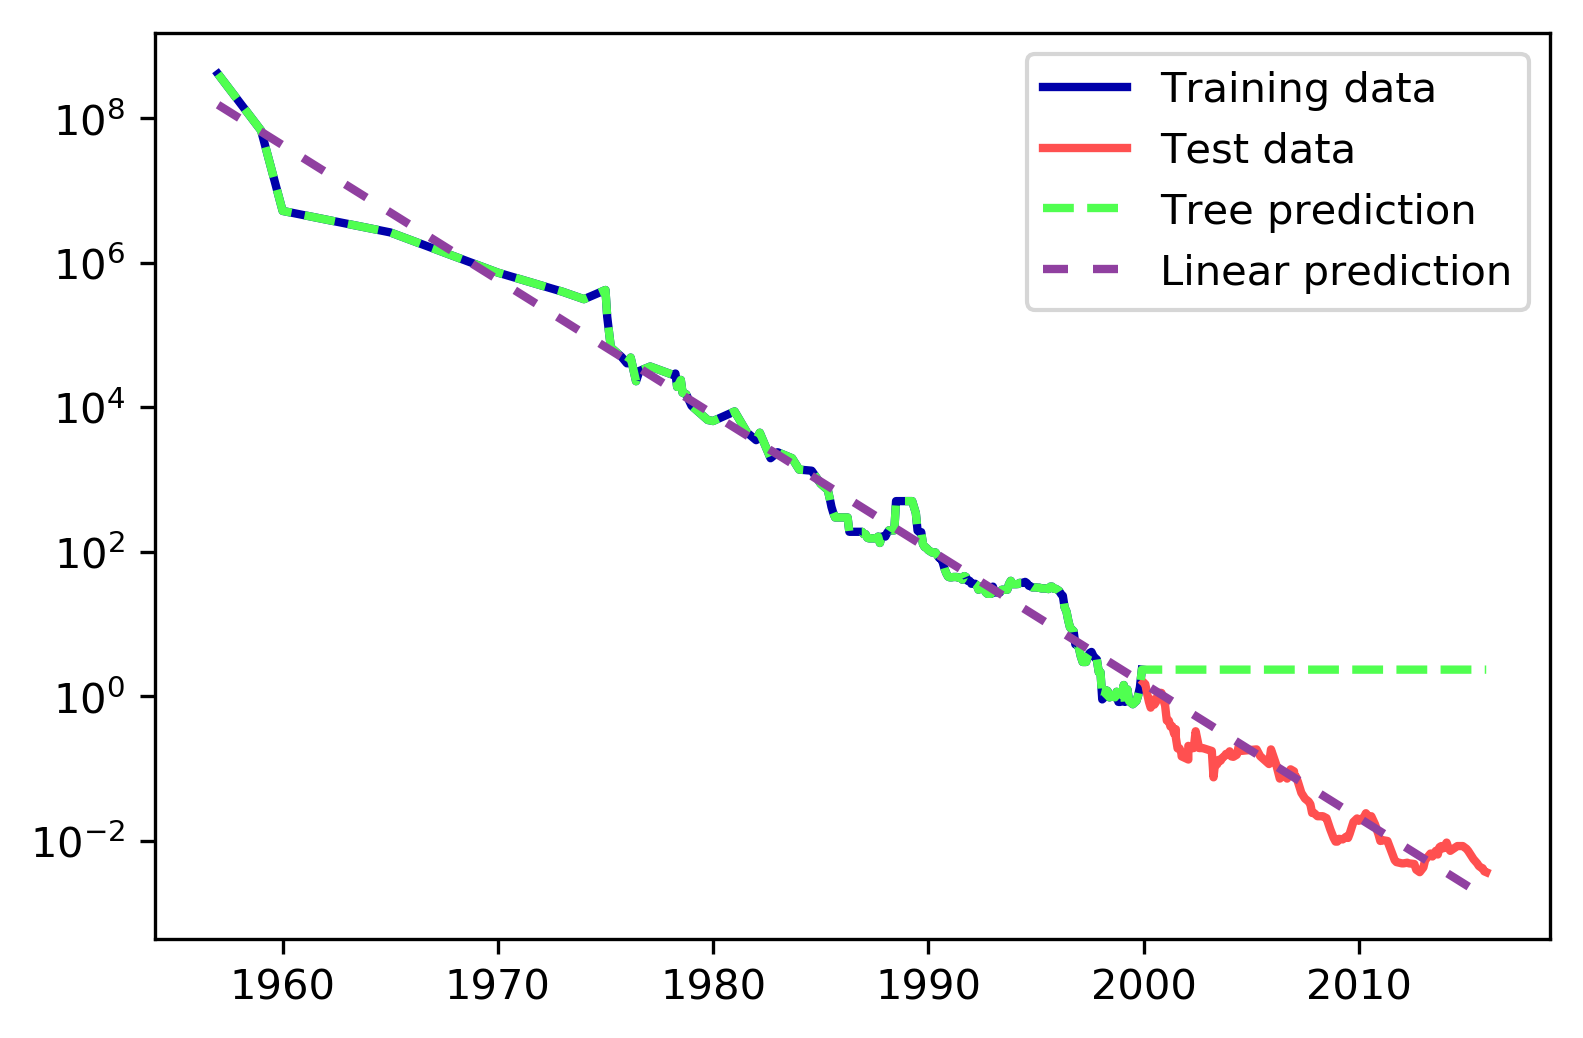

In [18]:
plt.semilogy(data_train.date, data_train.price, label="Training data")
plt.semilogy(data_test.date, data_test.price, label="Test data")
plt.semilogy(ram_prices.date, price_tree, label="Tree prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear prediction")
plt.legend()

- 위 트리 모델 훈련시에 모델 복잡도에 제한을 두지 않았음. --> 훈련 데이터를 완벽하게 예측함 --> 과적합
- 트리 모델을 사용한 테스트 시에 예측해야 할 값이 모델을 생성할 때 사용한 데이터 범위 밖에 존재할 때 트리는 적당하지 않음.

#### Strengths, weaknesses and parameters

- 트리 모델의 장점
  - 만들어진 모델을 쉽게 시각화하고 이해할 수 있음.
  - 각 특성은 개별적으로 다루어지기 때문에 특성의 정규화가 필요없음.
    - 각 특성의 스케일이 서로 달라도 문제 없이 모델 학습이 이루어짐.

- 트리 모델의 단점
  - 사전 가지치기를 사용할 지라도 종종 과대적합되는 경향이 있음. --> 해결책: Ensemble